<a href="https://colab.research.google.com/github/vijaykrishnachilukuri/data_analysis/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US Accidents Data Analysis

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import folium
from pandas_profiling import ProfileReport
%matplotlib inline
pd.set_option('display.max_columns', None)


In [ ]:
path1 = "/content/drive/MyDrive/Colab Notebooks/US_Accidents_Dec21_updated.csv"
df = pd.read_csv(path1)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.shape

(2845342, 47)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [ ]:
percentage_missing = df.isnull().mean().round(3).sort_values(ascending=False)* 100
percentage_missing

Number                   61.3
Precipitation(in)        19.3
Wind_Chill(F)            16.5
Wind_Speed(mph)           5.6
Humidity(%)               2.6
Wind_Direction            2.6
Weather_Condition         2.5
Visibility(mi)            2.5
Temperature(F)            2.4
Pressure(in)              2.1
Weather_Timestamp         1.8
Airport_Code              0.3
Timezone                  0.1
Nautical_Twilight         0.1
Civil_Twilight            0.1
Sunrise_Sunset            0.1
Astronomical_Twilight     0.1
Country                   0.0
Zipcode                   0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Turning_Loop              0.0
Traffic_Signal            0.0
Traffic_Calming           0.0
Stop                      0.0
Station                   0.0
Roundabout                0.0
Railway                   0.0
No_Exit                   0.0
Junction                  0.0
Give_Way                  0.0
Crossing                  0.0
Bump      

<AxesSubplot:>

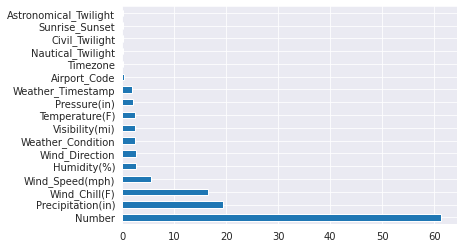

In [ ]:
percentage_missing[percentage_missing != 0].plot(kind='barh')

<AxesSubplot:>

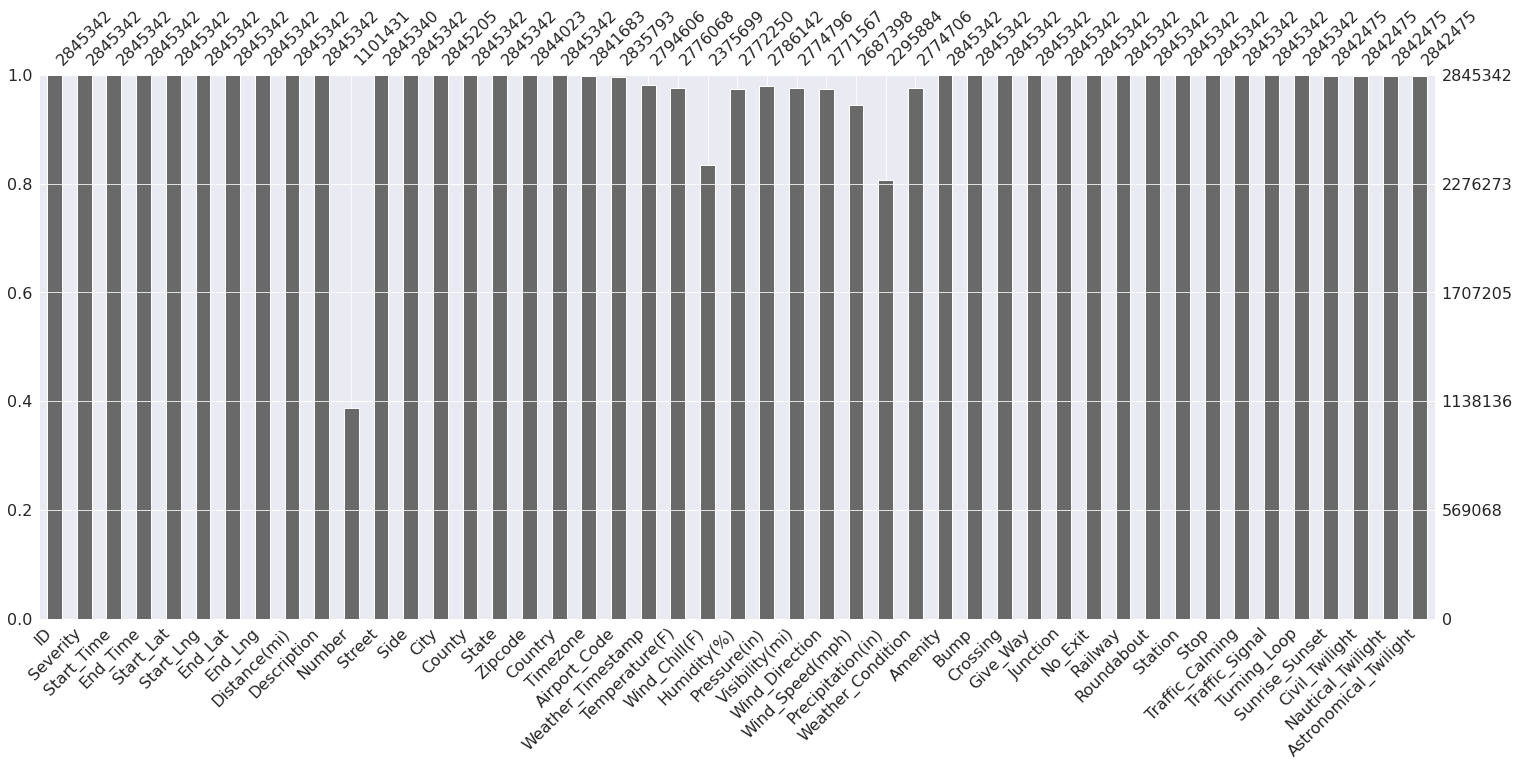

In [ ]:
msno.bar(df)

In [ ]:
#msno.matrix(df)

In [ ]:
#msno.heatmap(df)

In [ ]:
#msno.dendrogram(df)

In [ ]:
cities=df.City.unique ()
len(cities)

11682

In [ ]:
cities[:50]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville'], dtype=object)

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [ ]:
states_by_accident = df.State.value_counts()
states_by_accident

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

In [ ]:
states_by_accident.shape

(49,)

In [ ]:
cities_by_accident[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

In [ ]:
states_by_accident[:10]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

<AxesSubplot:>

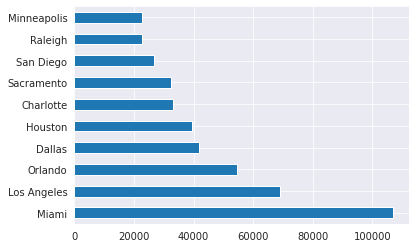

In [ ]:
cities_by_accident.head(10).plot(kind='barh')

<AxesSubplot:>

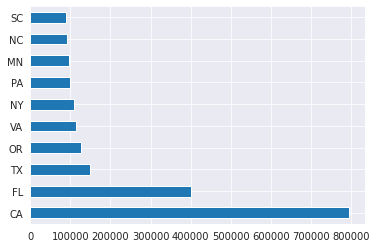

In [ ]:
states_by_accident.head(10).plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

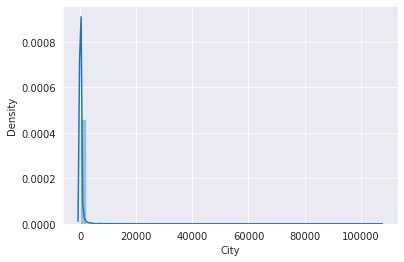

In [ ]:
sns.distplot(cities_by_accident)

<AxesSubplot:xlabel='City', ylabel='Count'>

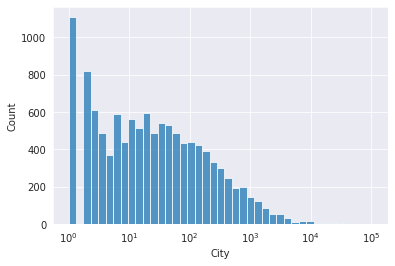

In [ ]:
sns.histplot(cities_by_accident,log_scale=True)

In [ ]:
cities_by_accident.mean() * 100

24357.54644294153

In [ ]:
cities_by_accident[cities_by_accident<=10].sort_values()

American Fork-Pleasant Grove     1
Elida                            1
Township 9                       1
De Graff                         1
Mound Bayou                      1
                                ..
Culleoka                        10
Dupo                            10
Abilene                         10
Green Lake                      10
Elba                            10
Name: City, Length: 4628, dtype: int64

In [ ]:
high_accident_cities_series=cities_by_accident.loc[(cities_by_accident>=1000)]
low_accident_cities_series=cities_by_accident.loc[(cities_by_accident<1000)]

In [ ]:
high_accident_cities_series[:5]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Name: City, dtype: int64

In [ ]:
low_accident_cities_series[:5]

Osseo          997
Madras         997
Manor          992
Portsmouth     988
Schenectady    985
Name: City, dtype: int64

In [ ]:
round(len(high_accident_cities_series)/len(cities)*100, 2)

4.25

<AxesSubplot:xlabel='City', ylabel='Count'>

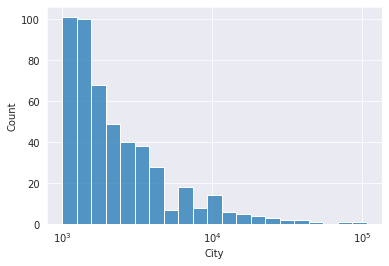

In [ ]:
sns.histplot(high_accident_cities_series, log_scale=True)

<AxesSubplot:xlabel='City', ylabel='Count'>

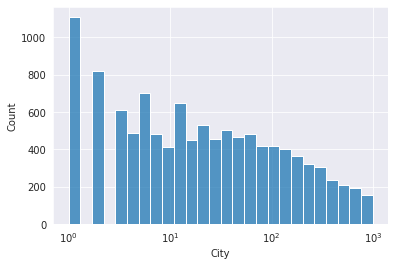

In [ ]:
sns.histplot(low_accident_cities_series, log_scale=True)

In [ ]:
df['Start_Time'] = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

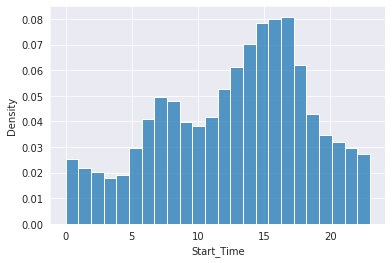

In [ ]:
sns.histplot(df.Start_Time.dt.hour,bins=24,stat='density')

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

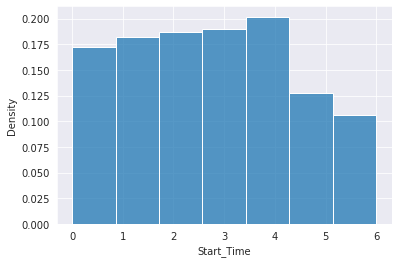

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek,bins=7,stat='density')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

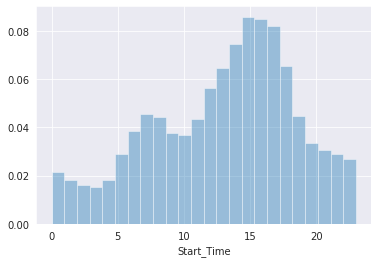

In [ ]:
friday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==4]
sns.distplot(friday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

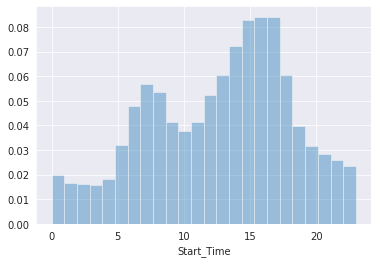

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==0]
sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

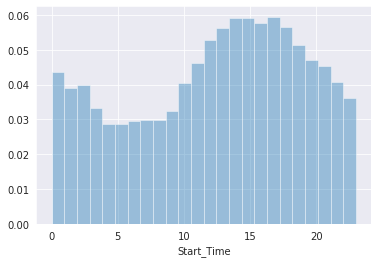

In [ ]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==6]
sns.distplot(sunday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

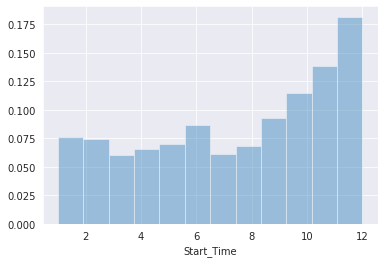

In [ ]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

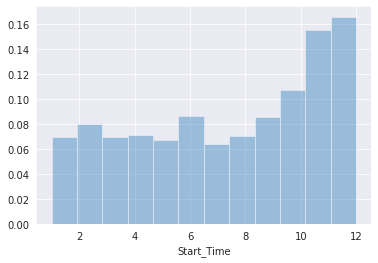

In [ ]:
sns.distplot(monday_start_time.dt.month,bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

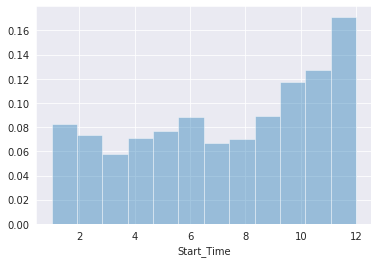

In [ ]:
sns.distplot(friday_start_time.dt.month,bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

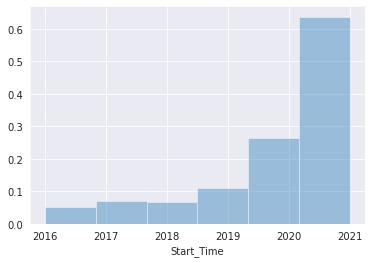

In [ ]:
sns.distplot(df.Start_Time.dt.year, bins=6, kde=False,norm_hist=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

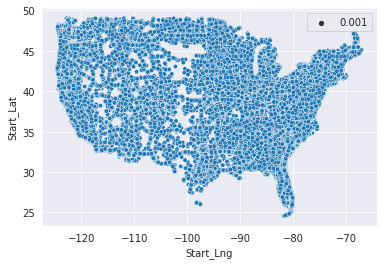

In [ ]:
sns.scatterplot(df.Start_Lng,df.Start_Lat,size=0.001)

In [ ]:
#map = folium.Map(location=[df.Start_Lat.mean(), df.Start_Lng.mean()], zoom_start=4,control_scale=True)

I am filtering out Missouri from the entire dataset

> Indented block



In [ ]:
mo = df[df.State.str.contains('MO')]
mo

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
11789,A-11790,2,2016-11-30 14:54:54,2016-11-30 20:54:54,39.16337,-94.55938,39.16539,-94.558920,0.142,At Parvin Rd/Exit 8 - Accident.,NaN,US-71 N,R,Kansas City,Clay,MO,64116,US,US/Central,KMKC,2016-11-30 14:54:00,39.9,31.8,53.0,29.84,10.0,WNW,15.0,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
11795,A-11796,3,2016-11-30 16:19:52,2016-11-30 22:19:52,38.64493,-90.52132,38.64777,-90.535521,0.791,Between Timberlake Manor Pky/Exit 21 and Chest...,NaN,US-61 N,R,Chesterfield,St. Louis County,MO,63017,US,US/Central,KSUS,2016-11-30 15:54:00,41.0,34.3,67.0,29.81,10.0,West,11.5,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
11799,A-11800,2,2016-11-30 16:30:25,2016-11-30 22:30:25,38.93941,-94.60008,38.94069,-94.593690,0.355,At Wornall Rd/Exit 75 - Accident.,NaN,I-435 E,R,Kansas City,Jackson,MO,64114,US,US/Central,KNKA,2016-11-30 16:47:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
11804,A-11805,3,2016-11-30 17:08:30,2016-11-30 23:08:30,38.65844,-90.44844,38.65309,-90.448240,0.370,At MO-AB/Ladue Rd/Exit 13 - Accident.,NaN,I-270 S,R,Saint Louis,St. Louis County,MO,63141,US,US/Central,KSTL,2016-11-30 16:51:00,42.1,34.9,58.0,29.83,10.0,West,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day
11805,A-11806,2,2016-11-30 17:09:51,2016-11-30 23:09:51,38.57067,-90.44089,38.56720,-90.440210,0.243,At Big Bend Rd/Exit 7 - Accident.,NaN,I-270 S,R,Saint Louis,St. Louis County,MO,63122,US,US/Central,KSTL,2016-11-30 16:51:00,42.1,34.9,58.0,29.83,10.0,West,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845030,A-2845031,3,2019-08-23 13:44:28,2019-08-23 14:12:14,38.62960,-90.22379,38.63118,-90.232690,0.493,At Forest Park Blvd/Exit 38 - Accident. Left l...,NaN,US-40 W,R,Saint Louis,St. Louis City,MO,63103,US,US/Central,KCPS,2019-08-23 13:53:00,82.0,82.0,58.0,29.63,10.0,E,14.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845031,A-2845032,3,2019-08-23 13:46:53,2019-08-23 14:14:32,38.37239,-90.38137,38.36708,-90.384670,0.408,At Imperial Main St/Exit 186 - Accident. Left ...,NaN,I-55 S,R,Imperial,Jefferson,MO,63052,US,US/Central,KCPS,2019-08-23 13:53:00,82.0,82.0,58.0,29.63,10.0,E,14.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845032,A-2845033,2,2019-08-23 06:49:04,2019-08-23 07:18:33,39.26730,-94.44269,39.26272,-94.448510,0.444,At MO-291/Exit 17 - Accident. Right lane blocked.,NaN,US-69 S,R,Liberty,Clay,MO,64068,US,US/Central,KGPH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845033,A-2845034,3,2019-08-23 08:04:06,2019-08-23 08:32:55,38.72529,-90.33146,38.73471,-90.331970,0.651,At I-70/Exit 7 - Accident. Left lane blocked.,NaN,I-170 N,R,Saint Louis,St. Louis County,MO,63134,US,US/Central,KSTL,2019-08-23 07:51:00,69.0,69.0,84.0,29.47,10.0,NE,7.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Fa

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

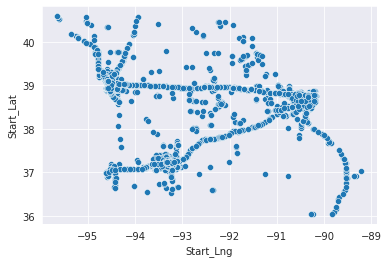

In [ ]:
sns.scatterplot(mo.Start_Lng, mo.Start_Lat)

In [ ]:
accidents_zip = mo.Zipcode.value_counts()
accidents_zip

64129         1305
64106         1135
64116          866
64108          863
64137          657
              ... 
65802-5077       1
65804-0044       1
64801-4574       1
65803-2819       1
63080-1560       1
Name: Zipcode, Length: 2310, dtype: int64

In [ ]:
accidents_zip.mean()

12.828138528138528

In [ ]:
accidents_zip.head(10)

64129    1305
64106    1135
64116     866
64108     863
64137     657
64055     586
64133     474
64127     460
64132     459
64120     437
Name: Zipcode, dtype: int64

<AxesSubplot:>

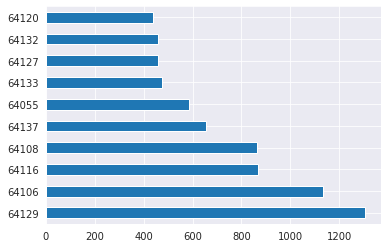

In [ ]:
accidents_zip.head(10).plot(kind='barh')

In [ ]:
high_accident_zipcode_series=accidents_zip.loc[(accidents_zip>=100)]
low_accident_zipcode_series=accidents_zip.loc[(accidents_zip<100)]

In [ ]:
high_accident_zipcode_series,\
low_accident_zipcode_series

(64129    1305
 64106    1135
 64116     866
 64108     863
 64137     657
          ... 
 63114     103
 63125     102
 64125     102
 63111     101
 65810     101
 Name: Zipcode, Length: 75, dtype: int64, 64063         99
 63144         97
 63115         94
 64102         93
 63132         88
               ..
 65802-5077     1
 65804-0044     1
 64801-4574     1
 65803-2819     1
 63080-1560     1
 Name: Zipcode, Length: 2235, dtype: int64)

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

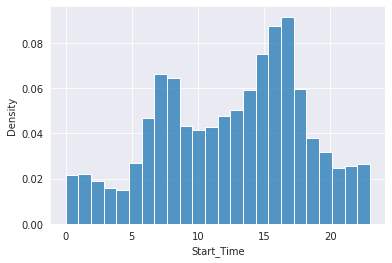

In [ ]:
sns.histplot(mo.Start_Time.dt.hour,bins=24,stat='density')

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

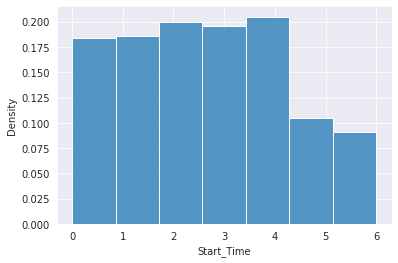

In [ ]:
sns.histplot(mo.Start_Time.dt.dayofweek,bins=7,stat='density')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

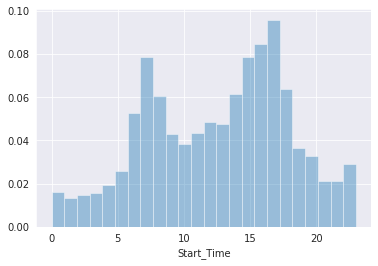

In [ ]:
monday_start_time = mo.Start_Time[mo.Start_Time.dt.dayofweek ==0]
sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

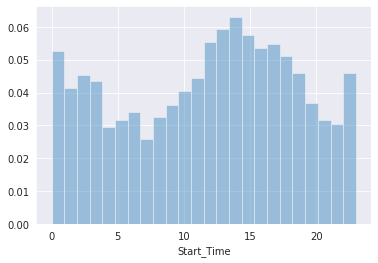

In [ ]:
sunday_start_time = mo.Start_Time[mo.Start_Time.dt.dayofweek ==6]
sns.distplot(sunday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

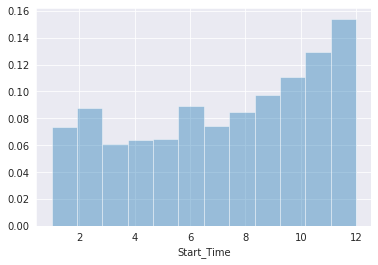

In [ ]:
sns.distplot(mo.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

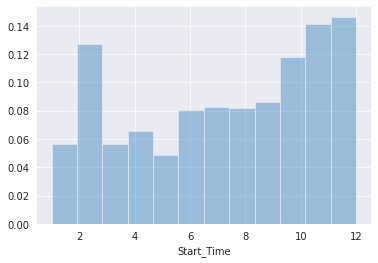

In [ ]:
sns.distplot(monday_start_time.dt.month,bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

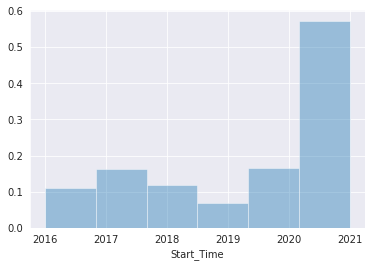

In [ ]:
sns.distplot(mo.Start_Time.dt.year, bins=6, kde=False,norm_hist=True)

In [ ]:
#mo.to_csv('/content/drive/MyDrive/Colab Notebooks/us_accidents_mo.csv', index = False)

In [ ]:
path2 = "/content/drive/MyDrive/Colab Notebooks/data.csv"
po = pd.read_csv(path2)

In [ ]:
po = po.rename(columns={'zip':'Zipcode'})
po

,Zipcode,population,city,county
0,63376,75031,St. Peters,St. Charles
1,65807,58366,Springfield,Greene
2,65203,58271,Columbia,Boone
3,63021,56154,Ballwin,St. Louis
4,63129,52287,St. Louis,St. Louis
...,...,...,...,...
904,65232,207,Benton City,Audrain
905,65327,205,Emma,Lafayette
906,63849,205,Gobler,Pemiscot
907,63439,203,Emden,Shelby


In [ ]:
po['Zipcode']=po['Zipcode'].astype(str)
po['Zipcode']

0      63376
1      65807
2      65203
3      63021
4      63129
       ...  
904    65232
905    65327
906    63849
907    63439
908    64498
Name: Zipcode, Length: 909, dtype: object

In [ ]:
po=po.drop(columns={'city', 'county'})
po

,Zipcode,population
0,63376,75031
1,65807,58366
2,65203,58271
3,63021,56154
4,63129,52287
...,...,...
904,65232,207
905,65327,205
906,63849,205
907,63439,203


In [ ]:
merge = mo.merge(po, on='Zipcode', how='left')

In [ ]:
merge

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,population
0,A-11790,2,2016-11-30 14:54:54,2016-11-30 20:54:54,39.16337,-94.55938,39.16539,-94.558920,0.142,At Parvin Rd/Exit 8 - Accident.,NaN,US-71 N,R,Kansas City,Clay,MO,64116,US,US/Central,KMKC,2016-11-30 14:54:00,39.9,31.8,53.0,29.84,10.0,WNW,15.0,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,16556.0
1,A-11796,3,2016-11-30 16:19:52,2016-11-30 22:19:52,38.64493,-90.52132,38.64777,-90.535521,0.791,Between Timberlake Manor Pky/Exit 21 and Chest...,NaN,US-61 N,R,Chesterfield,St. Louis County,MO,63017,US,US/Central,KSUS,2016-11-30 15:54:00,41.0,34.3,67.0,29.81,10.0,West,11.5,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,41344.0
2,A-11800,2,2016-11-30 16:30:25,2016-11-30 22:30:25,38.93941,-94.60008,38.94069,-94.593690,0.355,At Wornall Rd/Exit 75 - Accident.,NaN,I-435 E,R,Kansas City,Jackson,MO,64114,US,US/Central,KNKA,2016-11-30 16:47:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,25314.0
3,A-11805,3,2016-11-30 17:08:30,2016-11-30 23:08:30,38.65844,-90.44844,38.65309,-90.448240,0.370,At MO-AB/Ladue Rd/Exit 13 - Accident.,NaN,I-270 S,R,Saint Louis,St. Louis County,MO,63141,US,US/Central,KSTL,2016-11-30 16:51:00,42.1,34.9,58.0,29.83,10.0,West,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day,19824.0
4,A-11806,2,2016-11-30 17:09:51,2016-11-30 23:09:51,38.57067,-90.44089,38.56720,-90.440210,0.243,At Big Bend Rd/Exit 7 - Accident.,NaN,I-270 S,R,Saint Louis,St. Louis County,MO,63122,US,US/Central,KSTL,2016-11-30 16:51:00,42.1,34.9,58.0,29.83,10.0,West,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day,39239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29628,A-2845031,3,2019-08-23 13:44:28,2019-08-23 14:12:14,38.62960,-90.22379,38.63118,-90.232690,0.493,At Forest Park Blvd/Exit 38 - Accident. Left l...,NaN,US-40 W,R,Saint Louis,St. Louis City,MO,63103,US,US/Central,KCPS,2019-08-23 13:53:00,82.0,82.0,58.0,29.63,10.0,E,14.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,9204.0
29629,A-2845032,3,2019-08-23 13:46:53,2019-08-23 14:14:32,38.37239,-90.38137,38.36708,-90.384670,0.408,At Imperial Main St/Exit 186 - Accident. Left ...,NaN,I-55 S,R,Imperial,Jefferson,MO,63052,US,US/Central,KCPS,2019-08-23 13:53:00,82.0,82.0,58.0,29.63,10.0,E,14.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,27943.0
29630,A-2845033,2,2019-08-23 06:49:04,2019-08-23 07:18:33,39.26730,-94.44269,39.26272,-94.448510,0.444,At MO-291/Exit 17 - Accident. Right lane blocked.,NaN,US-69 S,R,Liberty,Clay,MO,64068,US,US/Central,KGPH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,38976.0
29631,A-2845034,3,2019-08-23 08:04:06,2019-08-23 08:32:55,38.72529,-90.33146,38.73471,-90.331970,0.651,At I-70/Exit 7 - Accident. Left lane blocked.,NaN,I-170 N,R,Saint Louis,St. Louis County,MO,63134,US,US/Central,KSTL,2019-08-23 07:51:00,69.0,69.0,84.0,29.47,10.0,NE,7.0,0.0,Mostly Cloudy,False,False,False,False,

In [ ]:
merge.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Number                   24817
Street                       0
Side                         0
City                         0
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     5
Airport_Code                 6
Weather_Timestamp           76
Temperature(F)             478
Wind_Chill(F)             7741
Humidity(%)                524
Pressure(in)               409
Visibility(mi)             476
Wind_Direction             237
Wind_Speed(mph)           1543
Precipitation(in)         9054
Weather_Condition          531
Amenity                      0
Bump                         0
Crossing

In [ ]:
merge = merge.dropna()
merge

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,population
241,A-13675,2,2016-12-16 19:38:00,2016-12-17 01:38:00,38.74984,-90.444580,38.74475,-90.441160,0.397,Ramp to I-270 Southbound - Accident.,13195.0,Interstate Dr,R,Maryland Heights,St. Louis County,MO,63043,US,US/Central,KSTL,2016-12-16 19:29:00,30.9,20.2,85.0,29.70,4.0,South,15.0,0.00,Light Freezing Drizzle,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,22133.0
2308,A-39470,2,2016-12-23 16:22:15,2016-12-23 22:22:15,38.74056,-90.396670,38.74901,-90.393940,0.602,Between I-70 and MO-115/MO-B/Natural Bridge Rd...,4274.0,N Lindbergh Blvd,R,Saint Ann,St. Louis County,MO,63074,US,US/Central,KSTL,2016-12-23 16:41:00,39.9,34.5,83.0,30.00,2.5,SSE,8.1,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,15279.0
2359,A-41795,2,2017-01-05 08:31:26,2017-01-05 14:31:26,38.61236,-90.201200,38.61369,-90.197500,0.220,At Park Ave/7th St/Exit 208 - Accident.,900.0,Marion St,R,Saint Louis,St. Louis City,MO,63104,US,US/Central,KCPS,2017-01-05 08:53:00,18.0,8.7,78.0,30.16,5.0,North,6.9,0.00,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,20150.0
2362,A-41827,2,2017-01-05 09:30:22,2017-01-05 15:30:22,38.59487,-90.326510,38.59510,-90.323550,0.161,At Shrewsbury Ave/Exit 283 - Accident.,4266.0,Shrewsbury Ave,L,Saint Louis,St. Louis County,MO,63119,US,US/Central,KCPS,2017-01-05 09:11:00,19.0,11.1,71.0,30.13,5.0,North,5.8,0.00,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,33752.0
2398,A-44347,3,2017-01-13 08:52:23,2017-01-13 14:52:23,38.56344,-90.244700,38.56369,-90.244170,0.033,At Virginia Ave/Exit 203 - Accident.,323.0,Bates St,R,Saint Louis,St. Louis City,MO,63111,US,US/Central,KCPS,2017-01-13 08:53:00,28.0,18.6,69.0,30.65,10.0,NE,10.4,0.01,Light Freezing Rain,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day,20608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29500,A-2827448,2,2019-07-16 10:29:59,2019-07-16 10:58:00,39.15774,-94.587391,39.15195,-94.581471,0.511,At Design Dr - Accident. Right lane blocked.,3742.0,NW M 9 Hwy E,L,Kansas City,Clay,MO,64116,US,US/Central,KMKC,2019-07-16 10:26:00,80.0,80.0,69.0,29.15,10.0,NW,10.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,16556.0
29559,A-2834496,4,2019-07-31 22:04:28,2019-07-31 22:33:36,38.77041,-90.338740,38.77675,-90.346190,0.594,Ramp closed to I-170/Exit 26 - Road closed due...,8794.0,Nyflot Ave,L,Hazelwood,St. Louis County,MO,63042,US,US/Central,KSTL,2019-07-31 21:51:00,73.0,73.0,66.0,29.50,10.0,E,8.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,18310.0
29572,A-2838412,2,2019-08-08 07:56:11,2019-08-08 09:43:15,38.90930,-94.390760,38.91289,-94.395690,0.363,At 3rd St - Accident.,873.0,SW Blue Pkwy,L,Lees Summit,Jackson,MO,64063,US,US/Central,KLXT,2019-08-08 07:53:00,70.0,70.0,90.0,28.90,10.0,SW,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,20455.0
29575,A-2838449,2,2019-08-09 08:10:24,2019-08-09 08:38:11,38.90930,-94.390760,38.91289,-94.395690,0.363,At 3rd St - Accident.,873.0,SW 

In [ ]:
merge.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [ ]:
merge.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


In [ ]:
merge.loc[:,'population']=merge['population'].astype(int)
merge['population']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


241      22133
2308     15279
2359     20150
2362     33752
2398     20608
         ...  
29500    16556
29559    18310
29572    20455
29575    20455
29598     8460
Name: population, Length: 1266, dtype: int64

In [ ]:
merge.loc[:,'Zipcode']=merge['Zipcode'].astype(int)
merge['Zipcode']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


241      63043
2308     63074
2359     63104
2362     63119
2398     63111
         ...  
29500    64116
29559    63042
29572    64063
29575    64063
29598    64129
Name: Zipcode, Length: 1266, dtype: int64

In [ ]:
merge.loc[:,'Accidents_per_100,000'] = round((merge['Zipcode']/merge['population']*100000),2)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
merge

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,population,"Accidents_per_100,000"
241,A-13675,2,2016-12-16 19:38:00,2016-12-17 01:38:00,38.74984,-90.444580,38.74475,-90.441160,0.397,Ramp to I-270 Southbound - Accident.,13195.0,Interstate Dr,R,Maryland Heights,St. Louis County,MO,63043,US,US/Central,KSTL,2016-12-16 19:29:00,30.9,20.2,85.0,29.70,4.0,South,15.0,0.00,Light Freezing Drizzle,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,22133.0,284837.12
2308,A-39470,2,2016-12-23 16:22:15,2016-12-23 22:22:15,38.74056,-90.396670,38.74901,-90.393940,0.602,Between I-70 and MO-115/MO-B/Natural Bridge Rd...,4274.0,N Lindbergh Blvd,R,Saint Ann,St. Louis County,MO,63074,US,US/Central,KSTL,2016-12-23 16:41:00,39.9,34.5,83.0,30.00,2.5,SSE,8.1,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,15279.0,412814.97
2359,A-41795,2,2017-01-05 08:31:26,2017-01-05 14:31:26,38.61236,-90.201200,38.61369,-90.197500,0.220,At Park Ave/7th St/Exit 208 - Accident.,900.0,Marion St,R,Saint Louis,St. Louis City,MO,63104,US,US/Central,KCPS,2017-01-05 08:53:00,18.0,8.7,78.0,30.16,5.0,North,6.9,0.00,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,20150.0,313171.22
2362,A-41827,2,2017-01-05 09:30:22,2017-01-05 15:30:22,38.59487,-90.326510,38.59510,-90.323550,0.161,At Shrewsbury Ave/Exit 283 - Accident.,4266.0,Shrewsbury Ave,L,Saint Louis,St. Louis County,MO,63119,US,US/Central,KCPS,2017-01-05 09:11:00,19.0,11.1,71.0,30.13,5.0,North,5.8,0.00,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,33752.0,187008.18
2398,A-44347,3,2017-01-13 08:52:23,2017-01-13 14:52:23,38.56344,-90.244700,38.56369,-90.244170,0.033,At Virginia Ave/Exit 203 - Accident.,323.0,Bates St,R,Saint Louis,St. Louis City,MO,63111,US,US/Central,KCPS,2017-01-13 08:53:00,28.0,18.6,69.0,30.65,10.0,NE,10.4,0.01,Light Freezing Rain,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day,20608.0,306245.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29500,A-2827448,2,2019-07-16 10:29:59,2019-07-16 10:58:00,39.15774,-94.587391,39.15195,-94.581471,0.511,At Design Dr - Accident. Right lane blocked.,3742.0,NW M 9 Hwy E,L,Kansas City,Clay,MO,64116,US,US/Central,KMKC,2019-07-16 10:26:00,80.0,80.0,69.0,29.15,10.0,NW,10.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,16556.0,387267.46
29559,A-2834496,4,2019-07-31 22:04:28,2019-07-31 22:33:36,38.77041,-90.338740,38.77675,-90.346190,0.594,Ramp closed to I-170/Exit 26 - Road closed due...,8794.0,Nyflot Ave,L,Hazelwood,St. Louis County,MO,63042,US,US/Central,KSTL,2019-07-31 21:51:00,73.0,73.0,66.0,29.50,10.0,E,8.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,18310.0,344303.66
29572,A-2838412,2,2019-08-08 07:56:11,2019-08-08 09:43:15,38.90930,-94.390760,38.91289,-94.395690,0.363,At 3rd St - Accident.,873.0,SW Blue Pkwy,L,Lees Summit,Jackson,MO,64063,US,US/Central,KLXT,2019-08-08 07:53:00,70.0,70.0,90.0,28.90,10.0,SW,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,20455.0,313189.93
29575,A-2838449,2,2019-08-0

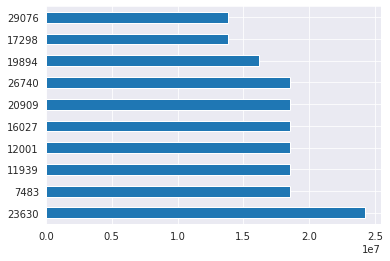

In [ ]:
#calculating accidents per capita
merge.nlargest(10, 'Accidents_per_100,000')['Accidents_per_100,000'].plot(kind='barh')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Select the independent variable and dependent variable
X = merge[['Visibility(mi)']]
y = merge['Severity']

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
# Create a linear regression object
lr = LinearRegression()

In [ ]:
# Fit the model to the data
lr.fit(X, y)

LinearRegression()

In [ ]:
# Print the coefficients and intercept
print(lr.coef_)
print(lr.intercept_)

[-0.0087721]
2.228898391669881


In [ ]:
# Print the equation of the regression line
print(f"y = {lr.coef_[0]:.2f} * x + {lr.intercept_:.2f}")

y = -0.01 * x + 2.23


In [ ]:
# calculate correlation coefficient between two columns
corr_coef = merge['Visibility(mi)'].corr(merge['Severity'])
corr_coef

-0.03735291524279032

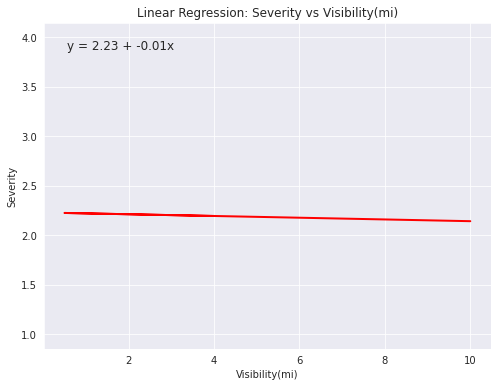

In [ ]:
# Create a scatter plot of Temperature vs. Severity
ax=merge.plot(kind='scatter', x='Visibility(mi)', y='Severity', figsize=(8, 6), marker= '', grid = True)
ax.set_title('Linear Regression: Severity vs Visibility(mi)')

# Add the equation of the regression line
equation = f'y = {lr.intercept_:.2f} + {lr.coef_[0]:.2f}x'
ax.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

# Add the regression line to the plot
plt.plot(X, lr.predict(X), color='red', linewidth=2)

# Display the plot
plt.show()
